In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt
from random import randint

# Finite State Markov chains

## Understanding transition matrices

We now learned that Markov chains can be defined using a transition probability matrix. The goal of the first part notebook is to get a sense of what transition matrices actually mean and how they affect the trajectory of a Markov process.

### A first example

Let us look at the properties of a two-state Markov chain. The transition matrix P is then a 2x2 matrix with elements [p_{ij}], where for i, j \in \{0, 1\}, p_{ij} is the probability that the process goes from state i into state j, given that the process is currently in state i.

In [2]:
# probability of moving from 0 to 0
p_00 = 0.2
# probability of moving from 1 to 0
p_10 = 0.8
P = np.array([[p_00, 1-p_00], [p_10, 1-p_10]])

# we round the matrix to avoid floating point errors
P = np.round(P,10)

print("P = \n", P)

P = 
 [[0.2 0.8]
 [0.8 0.2]]


To make sure that we always have a stochastic matrix we define a function that tests this for us.

In [3]:
#here we check whether the matrix is a probability matrix
def check_trans(P):
    if np.shape(P)[1] != np.shape(P)[0]:
        print("This is not a proper transition matrix, it is not square.")
        return
    elif True in (P < 0):
        print("This is not a proper transition matrix, at least one entry is negative.")
        return
    elif False in ( np.sum(P, axis = 1) == 1):
        print("This is not a proper transition matrix, at least one row does not sum to 1.")
        return

Let us first look at the path of one example of such a Markov chain. Before you run the script below, try to think about how you would imagine the path to look like given the transition matrix $P$ above. For this we define a function *path*, that prints the plot of the path and takes as inputs $P$, a transition matrix, $start$, the starting state, and $nsteps$, the number of step we want it to make.

In [4]:
def plot_path(P, start, nsteps):
    
    #f irst we check whether we have a valid transition matrix
    check_trans(P)
    
    # second we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    plt.figure(figsize=(17, 4))  
    # Remove the plot frame lines.
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    
    #Label axes and put in ticks
    plt.ylabel('State')
    plt.xlabel('Time')
    plt.axis([-1, nsteps+1, -0.2, np.shape(P)[1]-0.8])
    plt.xticks(np.arange(0, nsteps+1, step=max(1,np.floor(nsteps/20))));
    plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));    
    
    # we will use this to save the states
    X = np.zeros(nsteps+1)
    # starting state
    X[0] = start
    for i in range(0, nsteps) :
        step = uniform.rvs(size = 1, loc = 0, scale = 1)
        next = 0
        while sum(P[int(X[i])][range(0,next+1)]) < step:
                  next = next + 1
        X[i+1] = next
        
    # Choose style of the lines
    ax.plot(X, linestyle= 'dotted', marker='s')
    return

Let us now apply this on our transition matrix. Choose the starting position by changing $start$: you can choose any number between 0 and the size of your matrix -1. In this case here, we can choose 0 or 1. You can also change the number of steps your sample of the Markov chain makes by changing the variable $steps$!

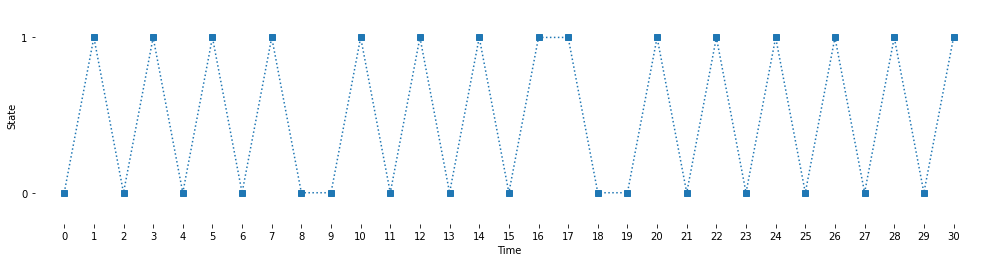

In [5]:
# number of steps
steps = 30
# initial state
start = 0

plot_path(P, start, steps)

How would you describe this path? Did it look like you expected? Run the script a few times to see if a pattern emerges.

While running the cell several times to see a few instances can be useful, in other cases we might want to draw multiple sample paths next to each other. Here we define a function _plot_mult_paths_ to do this. It takes the variables $P$, the transition matrix, $start$, the starting state, $nsteps$ the number of steps each sample path takes and $reps$, the number of sample paths that get plotted. Don't set the number of sample paths to too high or the plot will be cluttered.

In [6]:
# P is the transition matrix
# start is the starting state
# nsteps is the number of steps each sample takes
# reps is the number of paths that will be plotted

def plot_mult_paths(P, start, nsteps, reps):
    
    # first we check whether we have a valid transition matrix
    check_trans(P)
    
    # then we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    # create the figure we will add the plots to
    fig, axis = plt.subplots(reps, 1)
    
    # adjust the size of the figure
    fig.set_figheight(min(reps+2,10))
    fig.set_figwidth(17)
    
    #subplot spacing
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    
    for r in range(0,reps):
        # we will use this to save the states
        X = np.zeros(nsteps + 1)
        # starting state
        X[0] = start
        # now we sample the rth repetition of our path
        for i in range(0, nsteps) :
            step = uniform.rvs(size = 1, loc = 0, scale = 1)
            next = 0
            while sum(P[int(X[i])][range(0,next+1)]) < step:
                      next = next + 1
            X[i+1] = next
        
        # Remove the plot frame lines.
        ax = axis[r] 
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        
        # Choose style of the lines
        ax.plot(X, linestyle= 'dotted', marker='s', color = ('#%06X' % randint(0, 0xFFFFFF)))
        
        if r == reps-1:
            ax.set_xlabel('Time')
         
        if r == np.floor(reps/2):
            ax.set_ylabel('State')
        
        
    return

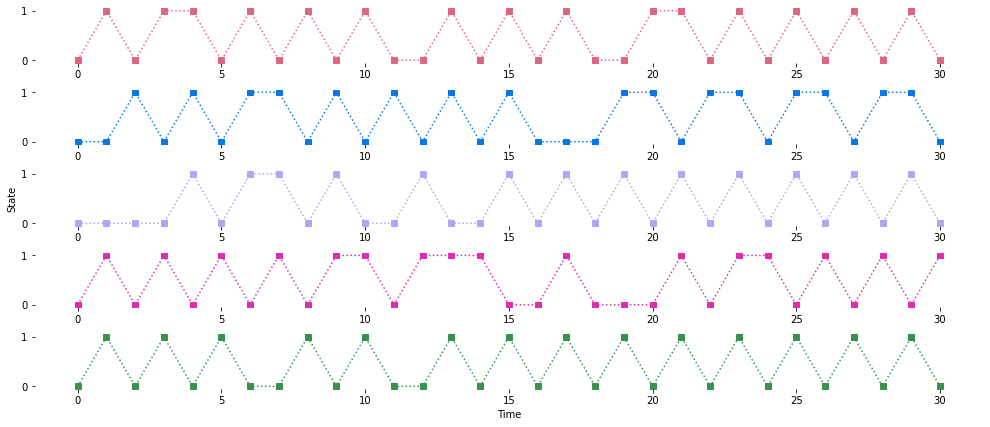

In [7]:
# initial state
start = 0
# number of steps for each path
steps = 30
# number of sample paths
reps = 5

plot_mult_paths(P, start, steps, reps)

Sometimes it is even more useful to plot several sample paths on top of each other. The following function _plot_many_paths_ does this: each path will be drawn in the same color, but with some transparency. So the lines and dots will be more pronounced in areas where the chain typically spends more time. 

The function _plot_many_paths_ takes the same input variables as the function _plot_mult_paths_. You typically want a higher number of repetition for this function, something like 30 for instance.

In [8]:
# P is the transition matrix
# start is the starting state
# nsteps is the number of steps each sample takes
# reps is the number of paths that will be plotted

def plot_many_paths(P, start, nsteps, reps):
    
    # first we check whether we have a valid transition matrix
    check_trans(P)
    
    # second we check whether start is a valid state of this Markov chain
    if start not in range(0,np.shape(P)[1]):
        print("This is not a valid starting point.")
        return
    
    # create the figure we will add the plots to
    plt.figure(figsize=(17, 4))  
    # Remove the plot frame lines.
    ax = plt.subplot(111)    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)    

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    
    #Label axes and put in ticks
    plt.ylabel('State')
    plt.xlabel('Time')
    plt.axis([-0.5, nsteps+1, -0.2, np.shape(P)[1]-0.8])
    plt.xticks(np.arange(0, nsteps+1, step=max(1,np.floor(nsteps/20))));
    plt.yticks(np.arange(0, np.shape(P)[1] , step = 1));  

    # Ensure that the axis ticks only show up on the bottom and left of the plot.    
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left() 
    
    for r in range(0,reps):
        # we will use this to save the states
        X = np.zeros(nsteps+1)
        # starting state
        X[0] = start
        for i in range(0, nsteps) :
            step = uniform.rvs(size = 1, loc = 0, scale = 1)
            next = 0
            while sum(P[int(X[i])][range(0,next+1)]) < step:
                      next = next + 1
            X[i+1] = next
        # Choose style of the lines
        ax.plot(X, linestyle= 'dotted', marker='s', alpha = 2/reps, color = "blue")
    return

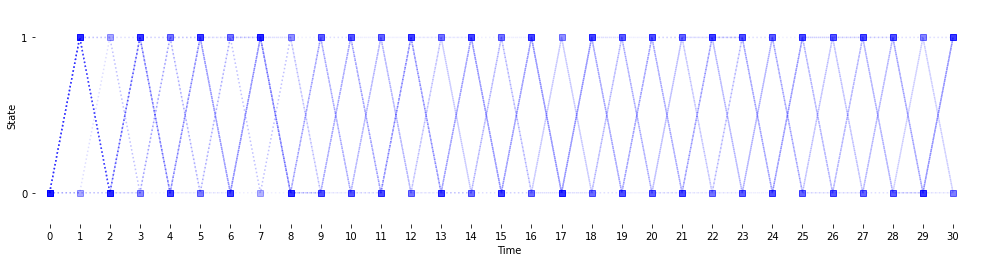

In [9]:
# initial state
start = 0
# number of steps for each path
steps = 30
# number of sample paths
reps = 30

plot_many_paths(P, start, steps, reps)

Do the plots of several paths at once reveal anything interesting about the Markov chain that you could not see when looking at single plots?

### A second example

Let's now change the matrix and see how the sample paths differ. We will denote the new transition matrix $R$.

In [10]:
# probability of moving from 0 to 0
p_00 = 0.8
# probability of moving from 1 to 0
p_10 = 0.2
R = np.array([[p_00, 1-p_00], [p_10, 1-p_10]])

# we round the matrix to avoid floating point errors
R = np.round(R,10)

print("R = \n", R)
check_trans(R)

R = 
 [[0.8 0.2]
 [0.2 0.8]]


Do you expect a typical path to look different now? If yes, how so?

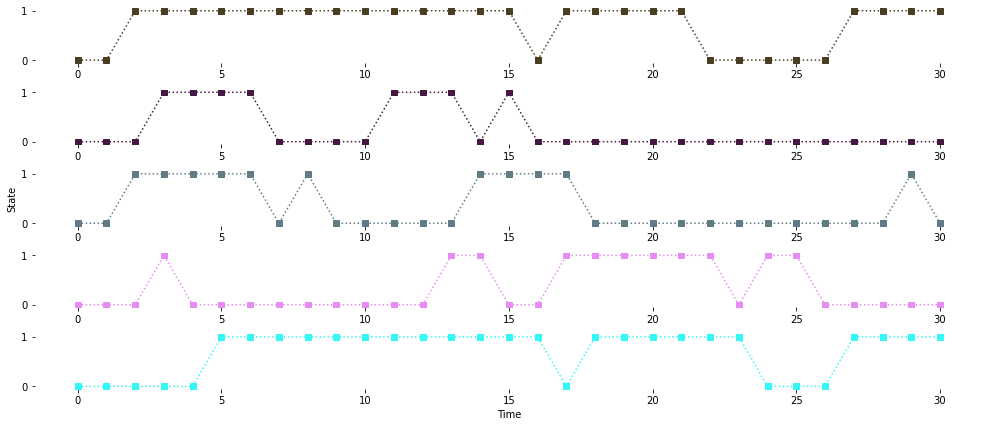

In [11]:
# initial state
start = 0
# number of steps for each path
steps = 30
# number of sample paths
reps = 5

plot_mult_paths(R, start, steps, reps)

How does a typical path look different with this transition matrix? Why is that so?

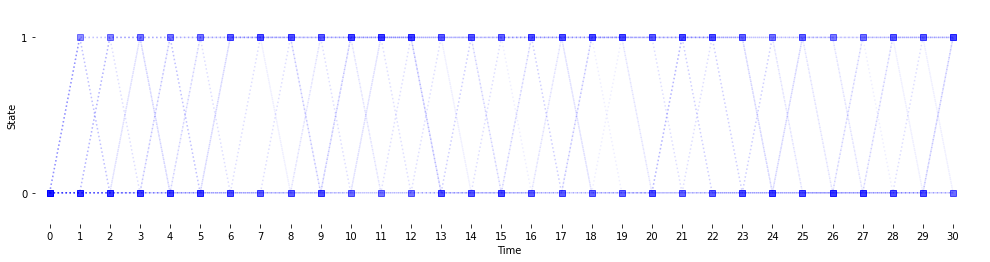

In [12]:
# initial state
start = 0
# number of steps for each path
steps = 30
# number of sample paths
reps = 30

plot_many_paths(R, start, steps, reps)

Compare this plot to the plot for the previous matrix. Is there any difference?

### A third example

Let us change the matrix one more time, this one is called $S$. Try again to guess how a typical path will look like and then see if you were right. After looking at a few sample paths, try to explain why the typical path looks the way it does.

In [13]:
# probability of moving from 0 to 0
p_00 = 0.8
# probability of moving from 1 to 0
p_10 = 0.8
S = np.array([[p_00, 1-p_00], [p_10, 1-p_10]])

# we round the matrix to avoid floating point errors
S = np.round(S,10)

print("S = \n", S)
check_trans(S)

S = 
 [[0.8 0.2]
 [0.8 0.2]]


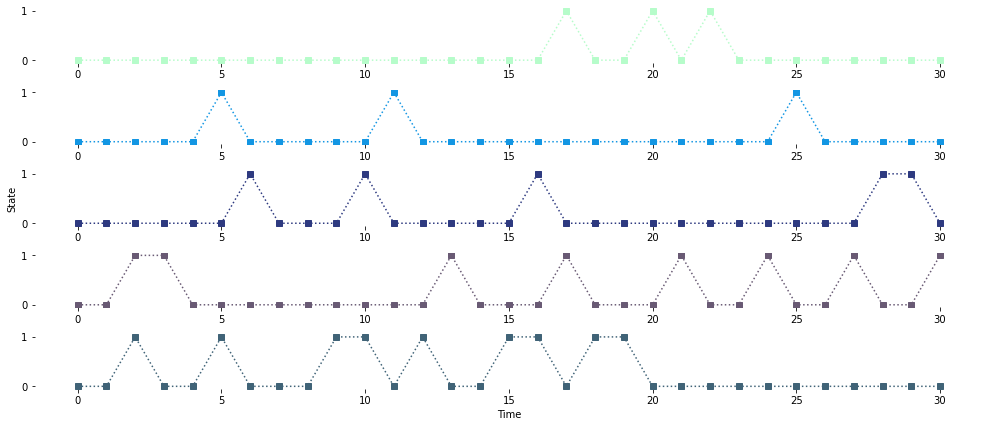

In [14]:
# initial state
start = 0
# number of steps for each path
steps = 30
# number of sample paths
reps = 5

plot_mult_paths(S, start, steps, reps)

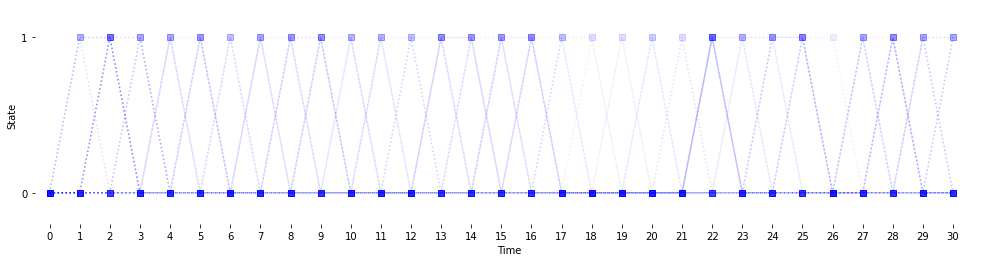

In [15]:
# initial state
start = 0
# number of steps for each path
steps = 30
# number of sample paths
reps = 30

plot_many_paths(S, start, steps, 30)

Compare the three Markoc chains we looked at, how are the sample paths different? How could you have predicted these behaviours from the transition matrices?